# Understanding and detecting Deepfakes (UnFakes)

* Deepfakes, which can serve as a visual and a creepy manifestation to the larger and pervasive problem of digital disinformation and online criminal behavior, are becoming more and more realistic. Therefore, people who understand the problem and can develop systems to detect Deepfakes are in growing demand. This problem will stay with our global society for a long time and, if anything, it will become even harder to solve.
* The techniques and tools that are learned in this project are not specific to Deepfake detection only. Image and video processing, image quality measures and image features computation, training SVM classifier, and evaluation analysis of the system performance - all these technique are important in many other image and video applications, including biometrics, video surveillance, video compression, object classification, etc.
* Understanding and visualizing the data is also very important, so plotting histograms, visualizing image artifacts, and plotting evaluation graphs are important tools that can also help to make an informed decision of how to solve a problem and/or explain the solution to others. 
* This project shows an importance of unbiased scientific evaluation. Why do we never evaluate on the dataset that the system was train on? Because the classifier can learn all the data in the training set and the evaluation results on the same set will be biased and will not show us the true performance of the system. It is important to apply a similar understanding to all other problems that rely on machine learning.
* Effectively presenting a final outcome from a data science project is crucial. In an executive summary, explain what you discovered, why it's important to a nontechnical audience, and actions that should be taken as a result.



# Milestone 1. Processing videos and face detection

In this section, we create list of our video data, extract frames from videos and save them to the disk, and detect and crop faces from face. We also visualize and compare frames and faces.

## 1.1. Processing the videos

**Objective:** Use openCV to read videos frame by frame. Use matplotlib or openCV to save the frames as images. Use openCV to compare frames from genuine and Deepfake videos. You can compute a simple difference between original and Deepfake frames and save the difference as an image. You can also compare the histograms of original and Deepfake frames.

Workflow: 

1. Use Python Glob library to recursively iterate through both real and fake videos folders.
2. Use a popular openCV library for image and video processing and analysis to loop through the frames of each video.
3. Save frames a JPEG images for one original (your choice) and the corresponding Deepfake video to the disk. You can use  matplotlib or openCV  for that.
4. Take one frame from an original video and the same frame from the corresponding Deepfake. Find difference between these two frames and save it as an image to visually see the difference. 
5. Compute histograms for these two frames (one from original video and the corresponding one from Deepfake) and visualize them with matplotlib. How does the difference look like? 
6. Observe what makes video frames from Deepfake videos look different compared to originals.

### Step 1.1.1: Loop through videos and create file lists

We assume that the required video data is downloaded and stored in the following folders (but the path can be changed accordingly):
* `./VidTIMIT` - folder with original videos
* `./DeepfakeTIMIT`- folder with Deepfake videos

Using `glob` we can loop through the video files in our real and fake folders and create a list of real and fake video files. We sort these lists, so that first few videos of real and fake correspond to each other. 


In [1]:
# the paths to the actual data can be changed here
real_folder = '/home/piggi/Desktop/deepfake/VidTIMIT/'
fake_folder = '/home/piggi/Desktop/deepfake/DeepfakeTIMIT/higher_quality/'  # we focus on high quality videos of DeepfakeTIMIT dataset


In [2]:
import numpy as np
import glob
import os
import cv2

# some settings to make it smoothly runnable in Jupyter
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
import matplotlib.pyplot as plt


# iterate through real and fake videos
# creates lists of real and fake videos
real_videos_list = []
fake_videos_list = []

for f in glob.glob(os.path.join(real_folder, "*/*.avi")):
    real_videos_list.append(f)
for f in glob.glob(os.path.join(fake_folder, "*/*.avi")):
    fake_videos_list.append(f)

# sort the videos:
real_videos_list = sorted(real_videos_list)
fake_videos_list = sorted(fake_videos_list)

# uncomment to check if the lists look fine
# print(real_videos_list[:5])
# print(fake_videos_list[:5])



### Step 1.1.2: save frames of one video to the disk

Pick and example real and fake video (we just take first from the corresponding lists) and save their frames to the disk and JPEG images using `openCV`.

In [3]:
# let's take one real video and one fake
real_video = real_videos_list[0]
fake_video = fake_videos_list[0]

# write a function that loops through frames and save them to the disk
def save_video_frames(video_path):
    image_name = os.path.splitext(video_path)[0]
    
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for frame_no in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        cv2.imwrite(image_name + '_' + str(frame_no) + '.jpg', frame)

# save frames of real video
save_video_frames(real_video)
save_video_frames(fake_video)



### Step 1.1.3: Compare real and fake frames

Take an example pair of real and fake frames we have saved and use `matplotlib` to display the images and their pixel-wise difference side-by-side.


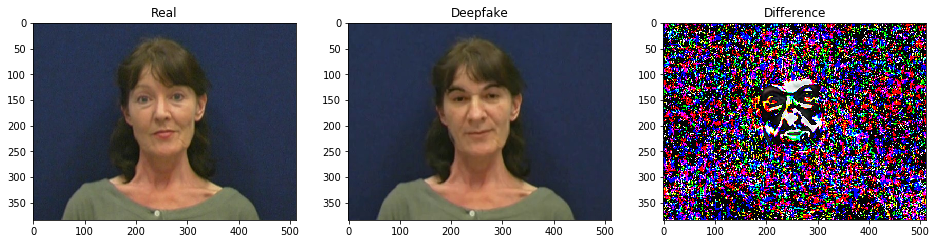

In [4]:
# take one frame from real video and the same one from fake
real_frame_name = os.path.splitext(real_video)[0] + '_1.jpg'
fake_frame_name = os.path.splitext(fake_video)[0] + '_1.jpg'

# define a function that will read and display given images and their difference
def read_display_images(real_image_name, fake_image_name):
    real_image = cv2.imread(real_image_name)
    fake_image = cv2.imread(fake_image_name)

    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)
    fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

    # find the difference between the images
    image_diff = None
    if real_image.shape == fake_image.shape:
        image_diff = real_image - fake_image

    # show the images side by side
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(real_image)
    plt.title('Real')
    plt.subplot(1, 3, 2)
    plt.title('Deepfake')
    plt.imshow(fake_image)
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.imshow(image_diff)
    plt.show()
    return real_image, fake_image, image_diff

real_image, fake_image, image_diff = read_display_images(real_frame_name, fake_frame_name)

### Step 1.1.4: Compute histograms of the images and the difference

Use `matplotlib` functionality to plot a histogram of an image.

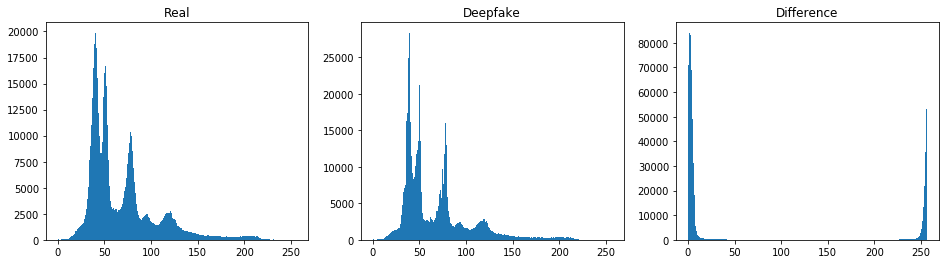

In [5]:
def display_histogram(real_image, fake_image, image_diff=None):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.title('Real')
    plt.hist(real_image.ravel(), 256, [0,256])
    plt.subplot(1, 3, 2)
    plt.title('Deepfake')
    plt.hist(fake_image.ravel(), 256, [0,256])
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.hist(image_diff.ravel(), 256, [0,256])
    plt.show()

display_histogram(real_image, fake_image, image_diff)

## 1.2. Detect faces in videos

**Objective:** Use `openCV` or [MTCNN](https://pypi.org/project/mtcnn/) face detectors to detect faces in each frame of the videos. `openCV` has very simple and popular `Viola-Jones` face detection algorithm. It is simple and fast and will work well on the videos from DeepfakeTIMIT database, since the videos show one person talking in front of the camera and the face is quite large. `MTCNN` is a neural network based face detector and is more accurate than the one in `openCV`. Which face detector you use for this project is not important and you can select the one you prefer or which you find easier to use.

**Workflow:** 

1. Load a video and loop through its frames.
2. Use `Viola-Jones` method provided in `openCV` to detect faces for each video frame of a given video. You can also use more advanced tools, for instance, the pre-trained `MTCNN` model is popular and has a higher accuracy of face detection.
3. Crop the detected faces and save them as images. Note that you can use different sizes of cropping rectangles. You can either take the rectangle that face detector gives you or you can enlarge it slightly (e.g., by 10-20%) and it may improve (or degrade too) the accuracy of Deepfake detection of your overall system. Basically, the size of the face that you crop out of the video frame is a parameter of your system. By changing it, you can achieve different detection results.

### Step 1.2.1: Loop through the frames, detect faces, and save to the disk

We extend the function above that loops through frame and save them as images by adding the face detection.

In [6]:
from mtcnn import MTCNN
detector = MTCNN()

def detect_face(image, box_scale=0.15):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detection_result = detector.detect_faces(image_rgb)
    # get a box around the face
    if len(detection_result) > 0:  # if a face is detected
        bounding_box = detection_result[0]['box']
        # enlarge detection box by the given scale
        x = int(bounding_box[0] - box_scale * bounding_box[2])
        y = int(bounding_box[1] - box_scale * bounding_box[3])
        w = int(bounding_box[2] + box_scale * bounding_box[2] * 2)
        h = int(bounding_box[3] + box_scale * bounding_box[3] * 2)
        # crop a face
        return image[y:y+h, x:x+w, :].copy()
    return None
    
def detect_and_save_faces(video_path, box_scale=0.15, limit_faces=-1, save_faces=True):
    detector = MTCNN()
    faces = list()
    # add '_face' at the end to differentiate face images
    face_name = os.path.splitext(video_path)[0] + '_face'
    
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for frame_no in range(num_frames):
        # if the given limit is not -1, loop only until the limit
        if limit_faces != -1 and frame_no >= limit_faces:
            break
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        # detect faces
        face = detect_face(frame, box_scale=box_scale)
        if face is not None:
            faces.append(face)
            if save_faces:
                cv2.imwrite(face_name + '_' + str(frame_no) + '.jpg', face)
    return faces

# save first 5 frames of real and fake videos 
real_faces = detect_and_save_faces(real_video, limit_faces=5)
fake_faces = detect_and_save_faces(fake_video, limit_faces=5)



Using TensorFlow backend.


### Step 1.2.1: Show faces side-by-side

To check that we can correctly detect faces, show one pair of real and fake faces side-by-side.


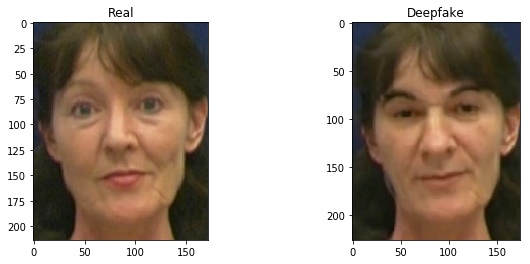

In [7]:
# show an example of the faces side by side
real_face_name = os.path.splitext(real_video)[0] + '_face_1.jpg'
fake_face_name = os.path.splitext(fake_video)[0] + '_face_1.jpg'

real_face, fake_face, _ = read_display_images(real_face_name, fake_face_name)


# Section 2 
## Workflow:
1. The task of defining good features is the most crucial one. The features you select will have a direct impact on the accuracy of the Deepfake detection. Some point to consider:
    1. You need to use features that would look different for original faces and Deepfake faces.
    2. You can take features from the matching and image similarity methods you have explored. Histograms could be
        helpful too.
    3. The most important point to understand here is that during feature computation, the system can only see one video at a time. It means the features should be computed for each face independently, i.e., given one image, and you should be able to produce a set of values that describes that image well.
    4. If a particular method of image similarity that you would like to use for feature computation requires two input images (usually reference and probe), then you can use a trick to make this method still work even though you have only one image (and no reference). You can create a second image artificially by blurring your probe image with Gausssian blur. Then, compute the similarity by using your image and its blurred version.
    5. Besides Structural Similarity Index (SSIM) computed using the image and its blurred version, you can also consider the following features (also computed using the image and its blurred version): Mean squared error (MSE), peak signal-to-noise ratio (PSNR), and average difference between the image and its blurred version. You can also add a histogram of the image or the histogram of the difference between the image and its blurred version.
    6. In the end, there should not be more than 300 values in the feature vector that you would compute for one image (face). Typically, you can aim to have from 40 to 150 feature values per image.
2. Extract features for a frame (face) and store them in HDF5 format, which is a good way to store numpy arrays. For a given facial image, compute features and then save the features in HDF5 file. You do not need to save the image as HDF5 files; just features is good enough. The resulting HDF5 file should contain one feature vector for this image.

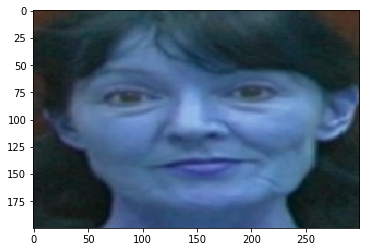

In [8]:
# detect difference about two images
from skimage.measure import compare_ssim
import imutils
import cv2
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


real_face_name = os.path.splitext(real_video)[0] + '_face_1.jpg'
fake_face_name = os.path.splitext(fake_video)[0] + '_face_1.jpg'

# load the two input images
image_orig = cv2.imread(real_face_name)
image_mod = cv2.imread(fake_face_name)

resized_orig = cv2.resize(image_orig, (300, 200))    
resized_mod = cv2.resize(image_mod, (300, 200))

plt.imshow(resized_orig)


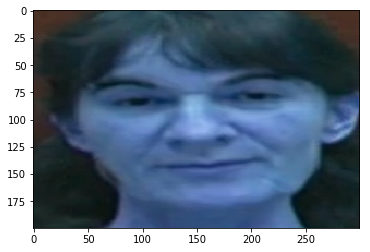

In [9]:
plt.imshow(resized_mod)

/home/piggi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  import sys


Structural Similarity Index: 0.6906496925871455


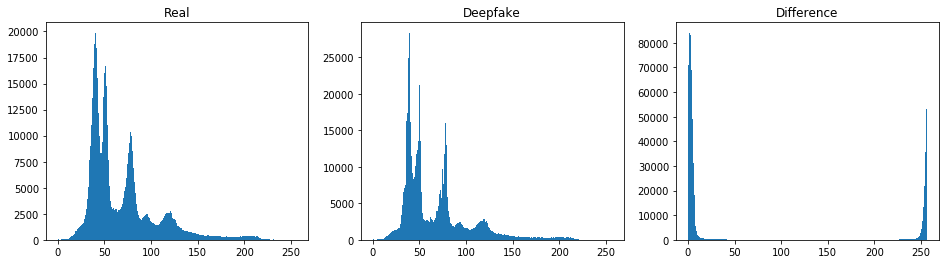

In [10]:
# convert the images to grayscale
gray_orig = cv2.cvtColor(resized_orig, cv2.COLOR_BGR2GRAY)
gray_mod = cv2.cvtColor(resized_mod, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(gray_orig, gray_mod, full=True)

diff = (diff * 255).astype("uint8")

print("Structural Similarity Index: {}".format(score))

display_histogram(real_image, fake_image, image_diff)

In [21]:
import cv2

psnr = cv2.PSNR(real_image, fake_image)

print(psnr)

32.84270334363297
